<a href="https://colab.research.google.com/github/sinyoung0110/DeepLearning_2024_2/blob/main/010_K_means_004(New%ED%99%9C%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### K-means  : 비지도 학습 - clustering - 차원축소(dimentionality reduction):주성분분석(PCA)
#### 데이터간 유사도(거리) 측정 방법 : 유클리드 거리, 맨해튼 거리, 민코프스키 거리, 코사인 유사도 등...

==========================================================
# DBSCAN
#### 밀도기반 군집 분석 (Density-Based Spatial Clustering of Applications with Noise, DBSCAN) : 일정 밀도 이상을 가진 데이터를 기준으로 군집을 형성하는 방법
==========================================================
# 장단점
#### 이상치가 많이 포함 되었을 때 사용
#### Noise 에 영향을 받지 않음
#### K-means 에 비해 연산량은 많지만 오목, 볼록 부분을 처리함
==========================================================
### K-Means와 DBSCAN 비교

|  **K-Means**             |  **DBSCAN**                                    |
|--------------------------|------------------------------------------------|
| K 값을 미리 설정해야 함    | 클러스터 개수(K)를 미리 설정할 필요 없음       |
| 군집의 모양이 **구형**인 경우 적합 | **비구형 군집**도 잘 탐지 가능               |
| **노이즈 처리 불가**      | **노이즈를 처리**할 수 있음                    |
| 모든 데이터를 클러스터에 포함 | 일부 데이터는 노이즈로 분류하여 클러스터에서 제외 |
| 빠르게 동작               | 연산량이 많아 느릴 수 있음                      |



#### PCA : 주성분 분석(Principal Component Analysis)
================================================
#### 특성 p개를 2~#개 정도로 압축해서 데이터를 시각화하여 봄
#### 유사한 특성(Feature)을 처리: 고차원 -> 저차원

In [ ]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn.cluster import DBSCAN                  #밀도 기반 군집 분석
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize         # Changed the import to be from sklearn.preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC



In [ ]:
# 데이터 불러오기
X = pd.read_csv('/content/sample_data/credit card.csv')

# 'CUST_ID' 열 삭제 (고객 ID는 분석에 필요하지 않을 수 있음)
X = X.drop('CUST_ID', axis=1)

# 결측값 처리 (결측값을 이전 값으로 채움)
X.fillna(method='ffill', inplace=True)  # ffill: 앞의 값으로 결측값을 채움

# 데이터의 첫 5개 행 출력
print(X.head())  # 데이터의 구조와 내용을 확인하기 위해 첫 5개 행을 출력


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

<ipython-input-47-e5462edb2e4b>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)  # ffill: 앞의 값으로 결측값을 채움


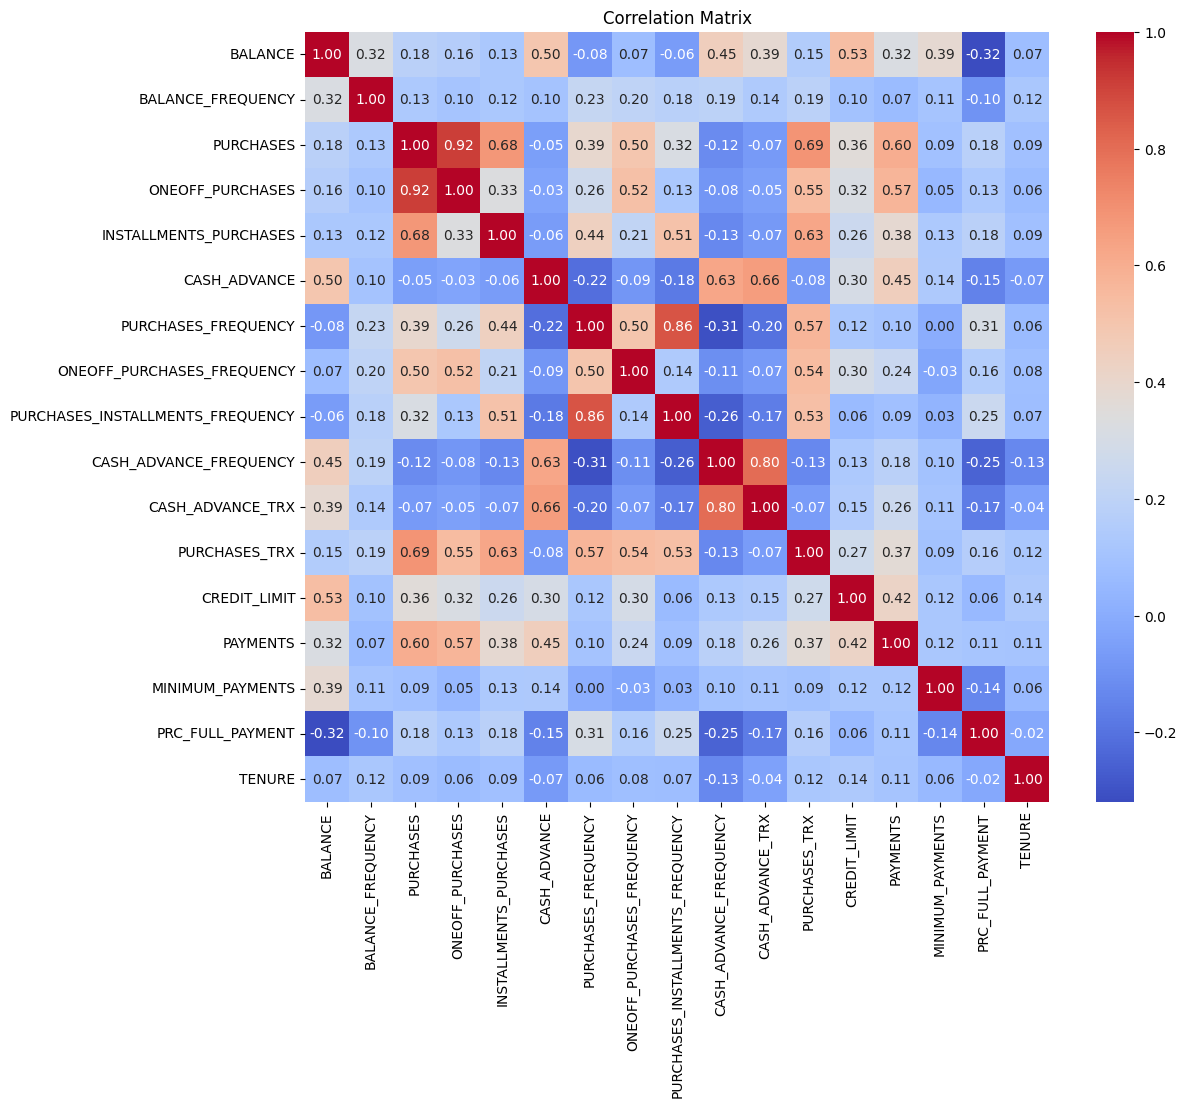

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


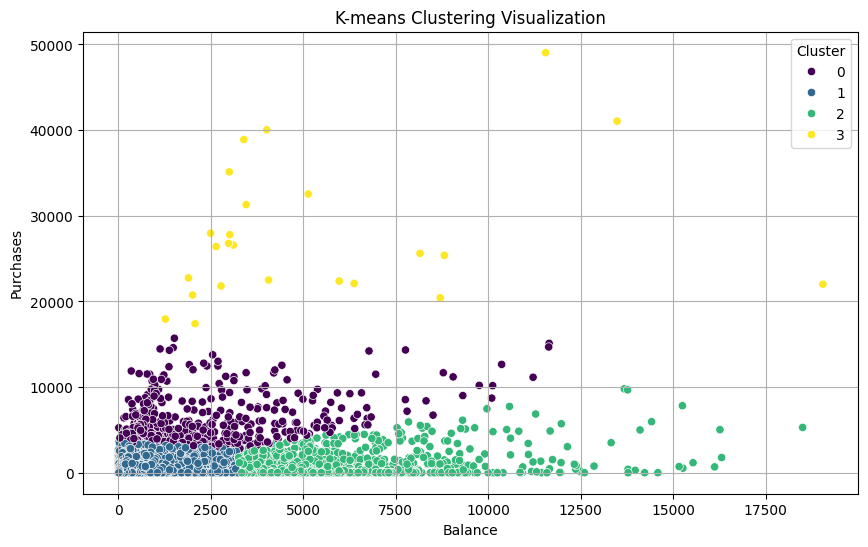

In [ ]:
from sklearn.cluster import KMeans

# K-means 클러스터링 예시
kmeans = KMeans(n_clusters=4, random_state=0)  # 4개의 클러스터로 설정
X['Cluster'] = kmeans.fit_predict(X[['BALANCE', 'PURCHASES']])

# 클러스터 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BALANCE', y='PURCHASES', hue='Cluster', data=X, palette='viridis')
plt.title('K-means Clustering Visualization')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.grid()
plt.show()


#### 전처리 & 데이터를 2차원으로 축소

In [ ]:
# 데이터 전처리 및 2차원으로 축소
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# 데이터 스케일링
scaler = StandardScaler()  # 데이터의 평균이 0, 표준편차가 1이 되도록 조정하는 스케일러 생성
X_scaled = scaler.fit_transform(X)  # 데이터를 스케일링하여 X_scaled에 저장

# 데이터 정규화
X_normalized = normalize(X_scaled)  # 데이터를 정규화하여 각 데이터 포인트의 크기를 1로 조정
X_normalized = pd.DataFrame(X_normalized)

# PCA를 통한 차원 축소
pca = PCA(n_components=2)
# 2차원으로 축소할 PCA 객체 생성
X_principal = pca.fit_transform(X_normalized)  # PCA를 적용하여 차원 축소
X_principal = pd.DataFrame(X_principal)  # 결과를 데이터프레임으로 변환
X_principal.columns = ['P1', 'P2']  # 새로운 데이터프레임의 열 이름을 P1, P2로 설정

# 결과 출력
print(X_principal.head())  # 축소된 데이터의 첫 5개 행 출력


         P1        P2
0 -0.476278 -0.684736
1 -0.519550  0.520431
2  0.323819  0.256876
3 -0.478831 -0.122847
4 -0.551043 -0.500270


In [ ]:
# DBSCAN 모델 생성 및 결과의 시각화


# 모델 생성 및 훈련
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal)
# eps: 두 데이터 포인트가 같은 클러스터에 속하기 위해 필요한 최대 거리입니다. 값이 작을수록 더 가까운 데이터 포인트들만 클러스터에 포함됩니다.
# min_samples: 새로운 클러스터의 중심점으로 간주되기 위해 필요한 최소 데이터 포인트 수입니다. 이 수치가 클수록 더 밀집한 군집이 필요합니다.


# 각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파일 배열을 Labels에 저장
labels = db_default.labels_

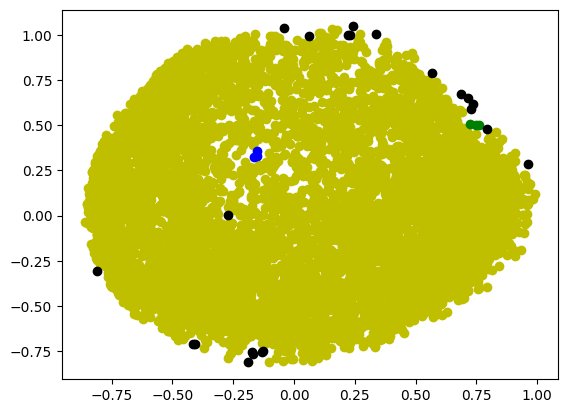

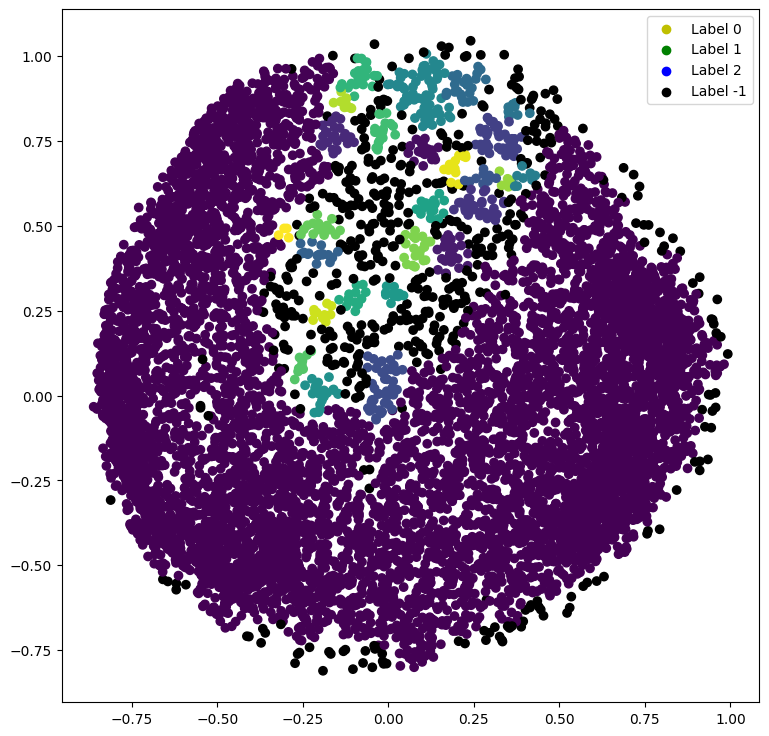

In [ ]:
# 각 레이블에 따라 데이터를 분리하여 시각화
r = plt.scatter(X_principal['P1'][labels == 0], X_principal['P2'][labels == 0], color='y')  # Label 0 (노란색)
g = plt.scatter(X_principal['P1'][labels == 1], X_principal['P2'][labels == 1], color='g')  # Label 1 (초록색)
b = plt.scatter(X_principal['P1'][labels == 2], X_principal['P2'][labels == 2], color='b')  # Label 2 (파란색)
k = plt.scatter(X_principal['P1'][labels == -1], X_principal['P2'][labels == -1], color='k')  # Label -1 (노이즈, 검은색)

# 그래프 크기 설정 및 클러스터 시각화
plt.figure(figsize=(9, 9))  # 플롯의 크기를 설정
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)  # 정의된 색상 벡터에 따라 P1, P2를 플로팅

# 범례 추가
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))  # 범례 설정
plt.show()  # 결과 플롯 출력


<ipython-input-56-ad80142dc31a>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors1 = cm.get_cmap('viridis', len(cluster_labels))(range(len(cluster_labels)))


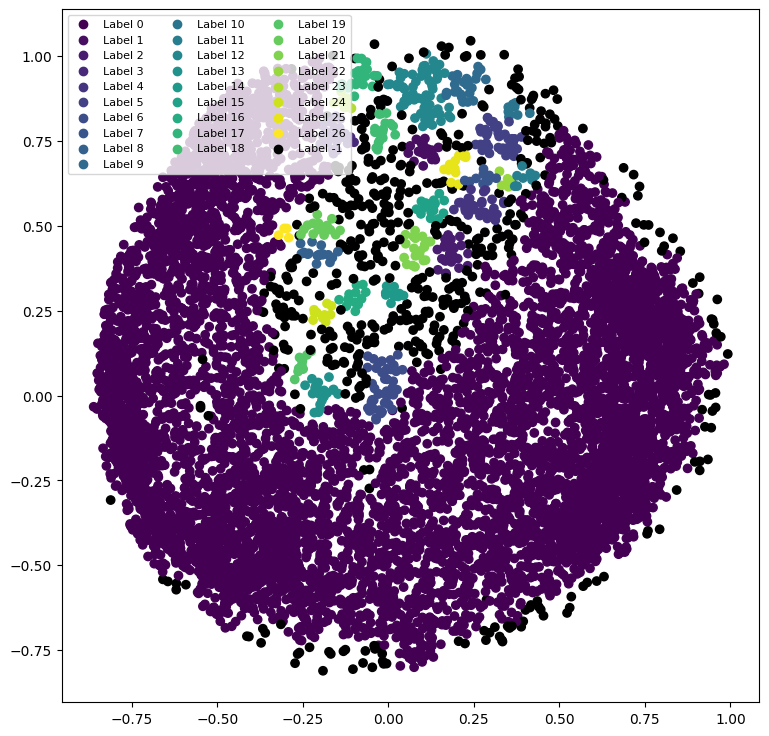

In [ ]:
# DBSCAN 모델 생성 및 결과의 시각화
import matplotlib.cm as cm # Import the cm module

# 모델 생성 및 훈련
db = DBSCAN(eps = 0.0375, min_samples = 10).fit(X_principal)
labels1 = db.labels_

# 노이즈를 나타내는 -1을 포함하여 고유한 클러스터 레이블을 가져옵니다.
unique_labels = set(labels1)

# 노이즈 레이블(-1)을 제외한 클러스터 레이블만 가져옵니다.
cluster_labels = [label for label in unique_labels if label != -1]

# 노이즈를 제외한 클러스터 수에 따라 색상 맵을 생성합니다.
colors1 = cm.get_cmap('viridis', len(cluster_labels))(range(len(cluster_labels)))

# 클러스터 레이블을 색상에 매핑하는 딕셔너리를 만듭니다.
# 노이즈 레이블(-1)은 검은색('k')으로 고정합니다.
colours1 = dict(zip(cluster_labels, colors1))
colours1[-1] = 'k'  # 노이즈는 검은색으로 고정

# colours1을 사용하여 나머지 플롯 코드를 작성합니다.
cvec = [colours1[label] for label in labels1]

# 플롯 코드 수정
plt.figure(figsize=(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)

# 범례 생성
handles = []
labels = []
for label, color in colours1.items():
    handles.append(plt.scatter([], [], color=color))  # 빈 scatter plot 객체 생성
    labels.append(f'Label {label}')  # 레이블 문자열 생성

plt.legend(handles, labels, scatterpoints=1, loc='upper left', ncol=3, fontsize=8)
plt.show()


 #### Grid Search, Randomized Search, Bayesian Optimization 중 어떤 방법이 가장 효율적일까?
------------------------------------
Grid Search:

>장점: 모든 조합을 탐색하여 최적값을 찾을 확률이 높습니다.

>단점: 하이퍼파라미터 공간이 커질수록 계산 비용이 기하급수적으로 증가합니다. 9000개 데이터에서도 하이퍼파라미터가 많고 범위가 넓다면 시간이 매우 오래 걸릴 수 있습니다.

====================================
####Randomized Search:

>장점: Grid Search보다 빠르게 좋은 결과를 얻을 수 있으며, 계산 비용을 제어할 수 있습니다.

>단점: 최적값을 찾을 확률은 Grid Search보다 낮습니다. 하지만, 제한된 시간 내에 좋은 결과를 얻는 데 효과적입니다.

====================================
####Bayesian Optimization:

>장점: 이전 평가 결과를 활용하여 효율적으로 탐색을 진행하므로, Randomized Search보다 더 빠르게 최적값을 찾을 수 있습니다. 특히 하이퍼파라미터 공간이 복잡하고 평가 비용이 높을 때 유리합니다.

>단점: 구현이 복잡하고, 초기 설정에 시간이 소요될 수 있습니다.

------------------------------------
#### 9000개 데이터셋에 대한 추천:
>하이퍼파라미터 공간이 크거나, 계산 시간을 줄이고 싶다면 Randomized Search를 추천합니다.


GridSearch는 10분이 넘어도 결과값이 안 나옴

In [ ]:

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# eps와 min_samples 값 범위 설정
eps_values = np.arange(0.01, 1.0, 0.05)
min_samples_values = range(2, 50)

# 최적 결과 저장 변수 초기화
best_score = -1  # 실루엣 점수는 -1부터 1까지이므로 -1로 초기화
best_eps = None
best_min_samples = None

# eps와 min_samples 조합별로 반복
for eps in eps_values:
    for min_samples in min_samples_values:
        # DBSCAN 모델 생성 및 학습
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_principal)

        # 클러스터가 2개 이상이고 모든 데이터가 같은 클러스터에 속하지 않을 때만 실루엣 점수 계산
        # (실루엣 점수는 클러스터가 1개이거나 모든 데이터가 같은 클러스터에 속하면 정의되지 않음)
        if len(set(labels)) > 1 and len(set(labels)) < len(labels):
            score = silhouette_score(X_principal, labels)

            # 현재 점수가 이전 최고 점수보다 높으면 최적값 업데이트
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# 최적 하이퍼파라미터 및 점수 출력
print(f"최적 eps: {best_eps}")
print(f"최적 min_samples: {best_min_samples}")
print(f"최고 실루엣 점수: {best_score}")

KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.base import BaseEstimator, ClusterMixin

# 사용자 정의 DBSCAN 클래스
class DBSCANWithSilhouette(BaseEstimator, ClusterMixin):
    def __init__(self, eps=0.5, min_samples=10):
        self.eps = eps
        self.min_samples = min_samples
        self.model = DBSCAN(eps=self.eps, min_samples=self.min_samples)

    def fit(self, X):
        self.labels_ = self.model.fit_predict(X)
        return self

    def score(self, X):
        if len(set(self.labels_)) > 1 and -1 in self.labels_:
            return silhouette_score(X, self.labels_)
        else:
            return -1  # 클러스터가 부족할 경우 낮은 점수 반환

# 하이퍼파라미터 탐색 공간 정의
param_dist = {
    'eps': uniform(0.001, 0.99),
    'min_samples': randint(2, 50)
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    estimator=DBSCANWithSilhouette(),
    param_distributions=param_dist,
    n_iter=50,
    scoring=make_scorer(silhouette_score, greater_is_better=True),  # 실루엣 점수를 사용
    random_state=42,
    n_jobs=-1
)

# Randomized Search 실행
random_search.fit(X_principal)

# 최적 하이퍼파라미터 및 점수 출력
print("최적 하이퍼파라미터:", random_search.best_params_)
print("최고 점수:", random_search.best_score_)

# 최적 모델
best_model = random_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


최적 하이퍼파라미터: {'eps': 0.3717947176588889, 'min_samples': 30}
최고 점수: nan


<ipython-input-68-68f1a495725b>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors1 = cm.get_cmap('viridis', len(cluster_labels))(range(len(cluster_labels)))


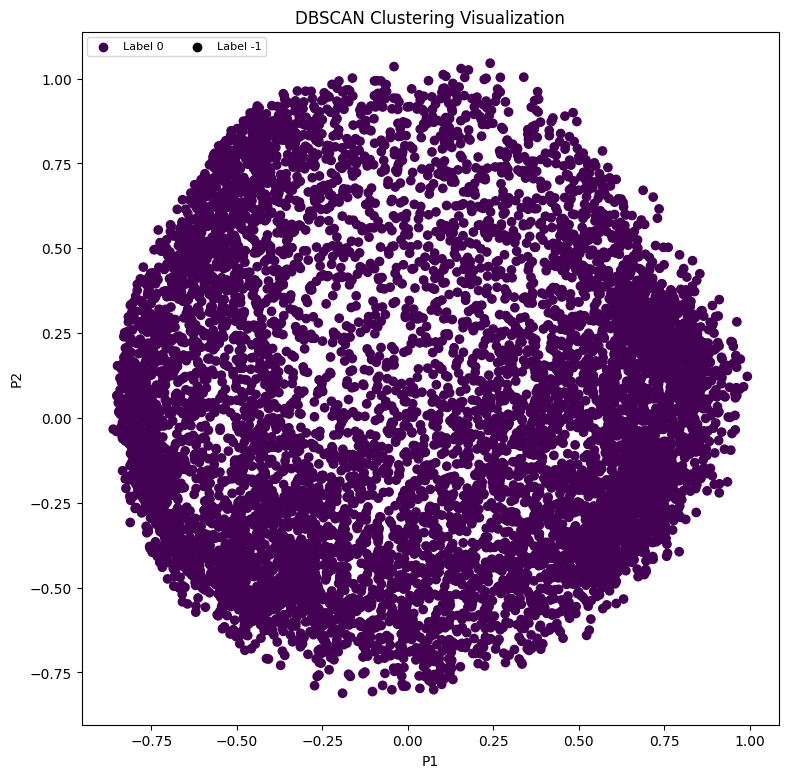

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

# DBSCAN 모델 생성 및 훈련
db = DBSCAN(eps=0.5, min_samples=10).fit(X_principal)
labels1 = db.labels_

# 고유한 클러스터 레이블 가져오기
unique_labels = set(labels1)
cluster_labels = [label for label in unique_labels if label != -1]

# 색상 맵 생성
colors1 = cm.get_cmap('viridis', len(cluster_labels))(range(len(cluster_labels)))
colours1 = dict(zip(cluster_labels, colors1))
colours1[-1] = 'k'  # 노이즈는 검은색으로 고정

# 색상 벡터 생성
cvec = [colours1[label] for label in labels1]

# 클러스터 플롯
plt.figure(figsize=(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
handles = []
labels = []
for label, color in colours1.items():
    handles.append(plt.scatter([], [], color=color))
    labels.append(f'Label {label}')
plt.legend(handles, labels, scatterpoints=1, loc='upper left', ncol=3, fontsize=8)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('P1')
plt.ylabel('P2')
plt.show()


### 실루엣 기법과 클러스터 시각화
빨간색 선이 평균 실루엣 점수인데 이 점수는 클러스터의 품질을 평가하는 지표입니다.

>1에 가까운 값: 해당 데이터 포인트가 같은 클러스터 내의 다른 포인트들과 매우 잘 맞고, 다른 클러스터의 포인트들과는 거리가 멀다는 것을 의미합니다.

>0에 가까운 값: 데이터 포인트가 클러스터 경계에 위치해 있다는 것을 의미합니다. 즉, 이 데이터 포인트는 어느 클러스터에도 잘 어울리지 않는 경우입니다.

>-1에 가까운 값: 데이터 포인트가 잘못된 클러스터에 속해 있다는 것을 의미합니다.

현재 모두 음수로 나오는 걸보면 클러스터의 품질이 안 좋다는 걸 알수 있습니다.

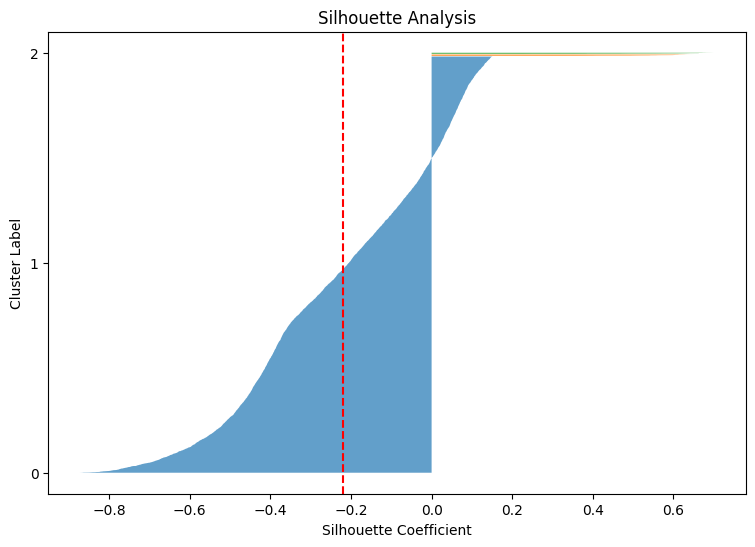

<ipython-input-69-2b4e8f8427c6>:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors1 = cm.get_cmap('viridis', len(cluster_labels))(range(len(cluster_labels)))


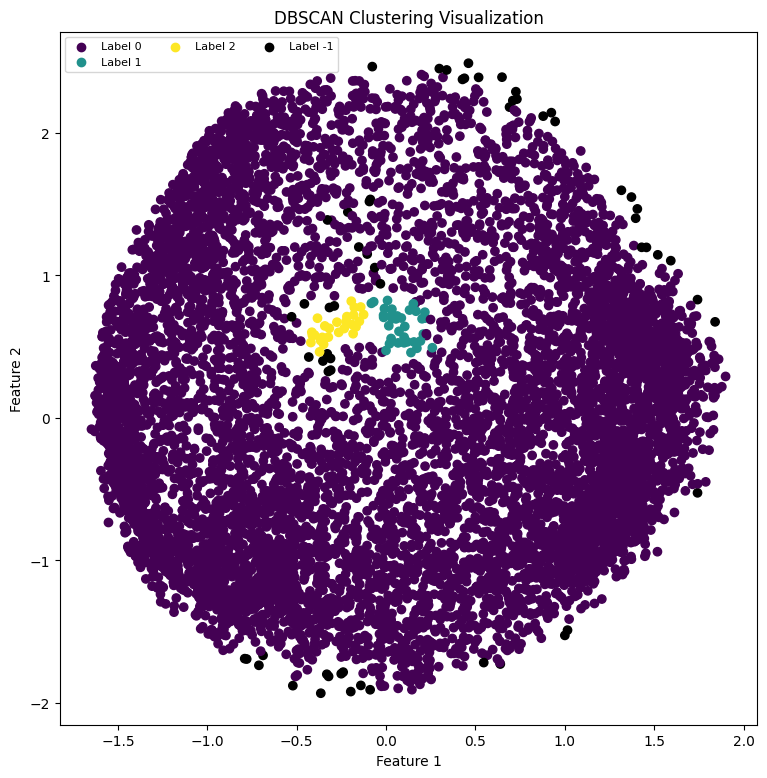

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np


# StandardScaler를 사용하여 데이터 전처리
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_principal)  # 데이터 스케일링

# 다양한 eps 및 min_samples 값 시도 (스케일링된 데이터에 맞게 범위 조정)
for eps in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for min_samples in [5, 10, 15, 20, 25]:
        # DBSCAN 모델 생성 및 훈련 (스케일링된 데이터에 적용)
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels1 = db.labels_

        # 고유한 클러스터 레이블 가져오기
        unique_labels = set(labels1)
        cluster_labels = [label for label in unique_labels if label != -1]

        # 2개 이상의 클러스터가 있는지 확인
        if len(cluster_labels) > 1:
            # 2개 이상의 클러스터가 있으면 실루엣 분석 및 시각화 진행

            # 실루엣 점수 계산
            silhouette_vals = silhouette_samples(X_scaled, labels1)
            silhouette_avg = silhouette_score(X_scaled, labels1)

            # 실루엣 플롯 그리기
            plt.figure(figsize=(9, 6))
            y_lower = 10

            for i in range(len(cluster_labels)):
                cluster_silhouette_vals = silhouette_vals[labels1 == cluster_labels[i]]
                cluster_silhouette_vals.sort()
                size = cluster_silhouette_vals.shape[0]
                y_upper = y_lower + size
                plt.fill_betweenx(np.arange(y_lower, y_upper), cluster_silhouette_vals, alpha=0.7)
                y_lower = y_upper + 10

            plt.axvline(silhouette_avg, color='red', linestyle='--')
            plt.title('Silhouette Analysis')
            plt.xlabel('Silhouette Coefficient')
            plt.ylabel('Cluster Label')

            # 수정된 부분: yticks를 설정하기 위한 배열을 수정합니다.
            # cluster_labels의 길이와 같은 간격으로 yticks를 설정합니다.
            ytick_positions = np.linspace(10, y_lower - 10, len(cluster_labels))
            plt.yticks(ytick_positions, cluster_labels)

            plt.show()

            # 클러스터 시각화
            colors1 = cm.get_cmap('viridis', len(cluster_labels))(range(len(cluster_labels)))
            colours1 = dict(zip(cluster_labels, colors1))
            colours1[-1] = 'k'  # 노이즈는 검은색으로 고정
            cvec = [colours1[label] for label in labels1]

            plt.figure(figsize=(9, 9))
            plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cvec)  # 스케일링된 데이터 사용
            handles = []
            labels = []
            for label, color in colours1.items():
                handles.append(plt.scatter([], [], color=color))
                labels.append(f'Label {label}')
            plt.legend(handles, labels, scatterpoints=1, loc='upper left', ncol=3, fontsize=8)
            plt.title('DBSCAN Clustering Visualization')
            plt.xlabel('Feature 1')  # 특징 이름으로 변경
            plt.ylabel('Feature 2')  # 특징 이름으로 변경
            plt.show()

            break  # 적절한 설정을 찾으면 내부 루프 종료
    else:
        continue
    break

else:
    print("2개 이상의 클러스터를 생성하는 설정을 찾지 못했습니다.")
    print("다른 클러스터")

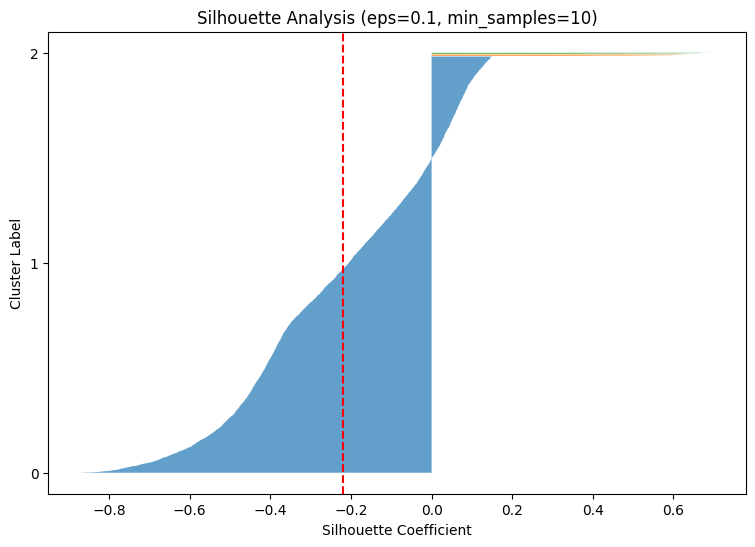

<ipython-input-73-cf5217f1fad2>:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors1 = cm.get_cmap('viridis', len(cluster_labels))(range(len(cluster_labels)))


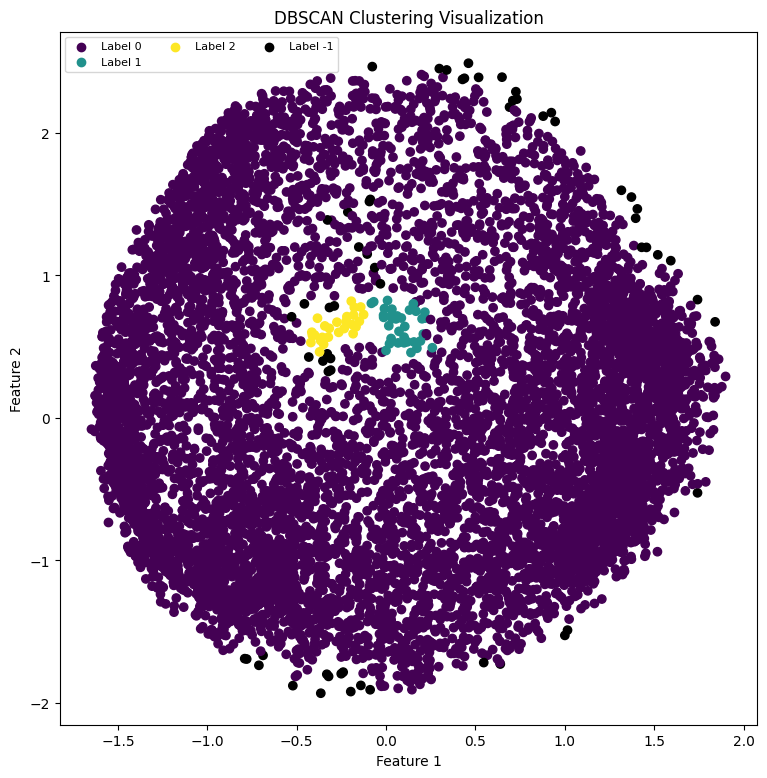

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 데이터 전처리
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_principal)  # 데이터 스케일링

# 결과를 저장할 리스트 초기화
results = []

# 다양한 eps 및 min_samples 값 시도
for eps in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for min_samples in [5, 10, 15, 20, 25]:
        # DBSCAN 모델 생성 및 훈련
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels1 = db.labels_

        # 고유한 클러스터 레이블 가져오기
        unique_labels = set(labels1)
        cluster_labels = [label for label in unique_labels if label != -1]

        # 2개 이상의 클러스터가 있는지 확인
        if len(cluster_labels) > 1:
            # 실루엣 점수 계산
            silhouette_vals = silhouette_samples(X_scaled, labels1)
            silhouette_avg = silhouette_score(X_scaled, labels1)

            # 결과 저장
            results.append({'eps': eps, 'min_samples': min_samples, 'silhouette_avg': silhouette_avg})

            # 실루엣 플롯 그리기
            plt.figure(figsize=(9, 6))
            y_lower = 10
            for i in range(len(cluster_labels)):
                cluster_silhouette_vals = silhouette_vals[labels1 == cluster_labels[i]]
                cluster_silhouette_vals.sort()
                size = cluster_silhouette_vals.shape[0]
                y_upper = y_lower + size
                plt.fill_betweenx(np.arange(y_lower, y_upper), cluster_silhouette_vals, alpha=0.7)
                y_lower = y_upper + 10

            plt.axvline(silhouette_avg, color='red', linestyle='--')
            plt.title(f'Silhouette Analysis (eps={eps}, min_samples={min_samples})')
            plt.xlabel('Silhouette Coefficient')
            plt.ylabel('Cluster Label')
            ytick_positions = np.linspace(10, y_lower - 10, len(cluster_labels))
            plt.yticks(ytick_positions, cluster_labels)
            plt.show()

            # 클러스터 시각화
            colors1 = cm.get_cmap('viridis', len(cluster_labels))(range(len(cluster_labels)))
            colours1 = dict(zip(cluster_labels, colors1))
            colours1[-1] = 'k'  # 노이즈는 검은색으로 고정
            cvec = [colours1[label] for label in labels1]

            plt.figure(figsize=(9, 9))
            plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cvec)
            handles = []
            labels = []
            for label, color in colours1.items():
                handles.append(plt.scatter([], [], color=color))
                labels.append(f'Label {label}')
            plt.legend(handles, labels, scatterpoints=1, loc='upper left', ncol=3, fontsize=8)
            plt.title('DBSCAN Clustering Visualization')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.show()

            break  # 적절한 설정을 찾으면 내부 루프 종료
    else:
        continue
    break

else:
    print("2개 이상의 클러스터를 생성하는 설정을 찾지 못했습니다.")



In [ ]:

# 결과를 저장할 리스트 초기화
results = []

# 다양한 eps 및 min_samples 값 시도
for eps in [0.01,0.02,0.03,0.04,0.05]:
    for min_samples in [ 10,15, 20, 25,30]:
        # DBSCAN 모델 생성 및 훈련
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels1 = db.labels_

        # 고유한 클러스터 레이블 가져오기
        unique_labels = set(labels1)
        cluster_labels = [label for label in unique_labels if label != -1]

        # 2개 이상의 클러스터가 있는지 확인
        if len(cluster_labels) >1:
            # 실루엣 점수 계산
            silhouette_vals = silhouette_samples(X_scaled, labels1)
            silhouette_avg = silhouette_score(X_scaled, labels1)

            # 결과 저장
            results.append({'eps': eps, 'min_samples': min_samples, 'silhouette_avg': silhouette_avg})

            # 실루엣 플롯 그리기
            plt.figure(figsize=(9, 6))
            y_lower = 10
            for i in range(len(cluster_labels)):
                cluster_silhouette_vals = silhouette_vals[labels1 == cluster_labels[i]]
                cluster_silhouette_vals.sort()
                size = cluster_silhouette_vals.shape[0]
                y_upper = y_lower + size
                plt.fill_betweenx(np.arange(y_lower, y_upper), cluster_silhouette_vals, alpha=0.7)
                y_lower = y_upper + 10

            plt.axvline(silhouette_avg, color='red', linestyle='--')
            plt.title(f'Silhouette Analysis (eps={eps}, min_samples={min_samples})')
            plt.xlabel('Silhouette Coefficient')
            plt.ylabel('Cluster Label')
            ytick_positions = np.linspace(10, y_lower - 10, len(cluster_labels))
            plt.yticks(ytick_positions, cluster_labels)
            plt.show()

            # 클러스터 시각화
            colors1 = cm.get_cmap('viridis', len(cluster_labels))(range(len(cluster_labels)))
            colours1 = dict(zip(cluster_labels, colors1))
            colours1[-1] = 'k'  # 노이즈는 검은색으로 고정
            cvec = [colours1[label] for label in labels1]

            plt.figure(figsize=(9, 9))
            plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cvec)
            handles = []
            labels = []
            for label, color in colours1.items():
                handles.append(plt.scatter([], [], color=color))
                labels.append(f'Label {label}')
            plt.legend(handles, labels, scatterpoints=1, loc='upper left', ncol=3, fontsize=8)
            plt.title('DBSCAN Clustering Visualization')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.show()


    else:
        continue
    break

else:
    print("2개 이상의 클러스터를 생성하는 설정을 찾지 못했습니다.")



2개 이상의 클러스터를 생성하는 설정을 찾지 못했습니다.


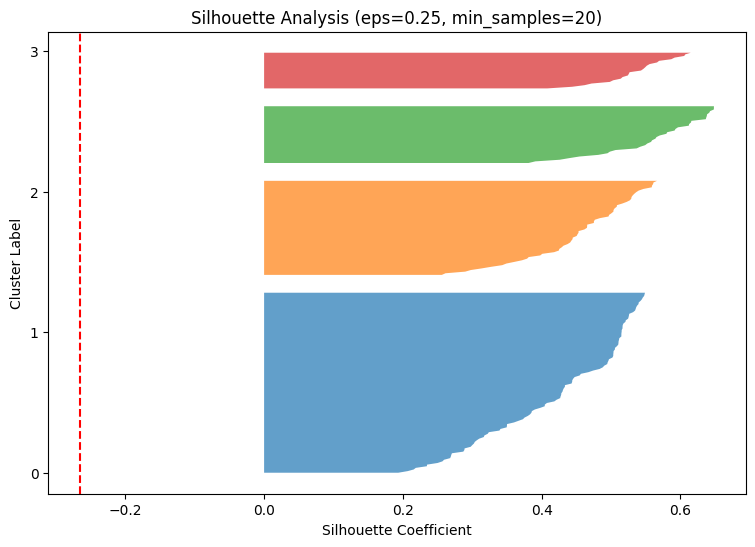

<ipython-input-37-33ddcacaeb41>:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors1 = cm.get_cmap('viridis', len(cluster_labels))(range(len(cluster_labels)))


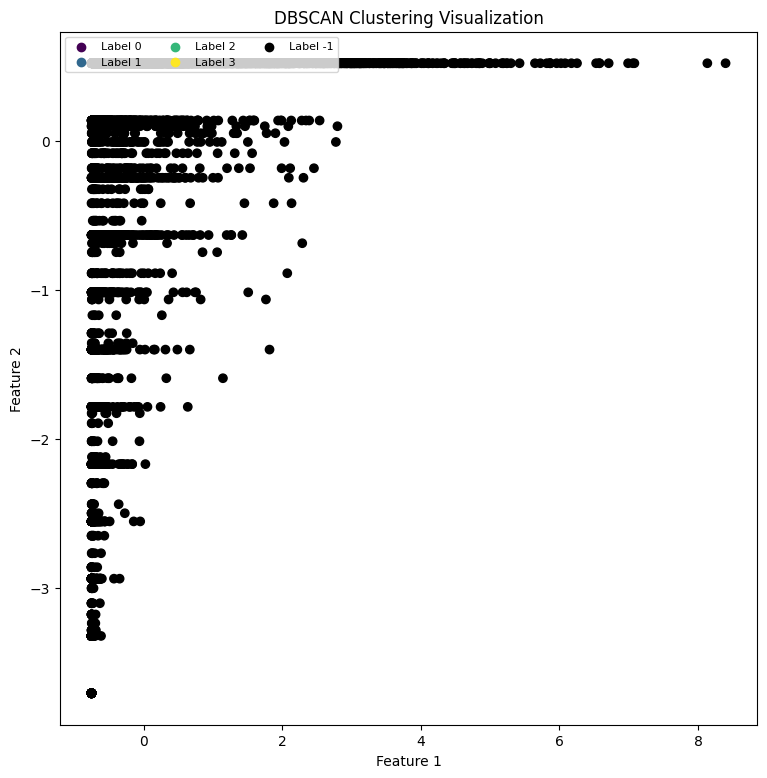

In [ ]:
# 다양한 eps 및 min_samples 값 시도
for eps in [0.05, 0.1, 0.15, 0.2, 0.25]:
    for min_samples in [3, 5, 10, 15, 20]:
        # DBSCAN 모델 생성 및 훈련
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels1 = db.labels_

        # 고유한 클러스터 레이블 가져오기
        unique_labels = set(labels1)
        cluster_labels = [label for label in unique_labels if label != -1]

        # 클러스터 수가 4개인지 확인
        if len(cluster_labels) == 4:
            # 실루엣 점수 계산
            silhouette_vals = silhouette_samples(X_scaled, labels1)
            silhouette_avg = silhouette_score(X_scaled, labels1)

            # 결과 저장
            results.append({'eps': eps, 'min_samples': min_samples, 'silhouette_avg': silhouette_avg})

            # 실루엣 플롯 그리기
            plt.figure(figsize=(9, 6))
            y_lower = 10
            for i in range(len(cluster_labels)):
                cluster_silhouette_vals = silhouette_vals[labels1 == cluster_labels[i]]
                cluster_silhouette_vals.sort()
                size = cluster_silhouette_vals.shape[0]
                y_upper = y_lower + size
                plt.fill_betweenx(np.arange(y_lower, y_upper), cluster_silhouette_vals, alpha=0.7)
                y_lower = y_upper + 10

            plt.axvline(silhouette_avg, color='red', linestyle='--')
            plt.title(f'Silhouette Analysis (eps={eps}, min_samples={min_samples})')
            plt.xlabel('Silhouette Coefficient')
            plt.ylabel('Cluster Label')
            ytick_positions = np.linspace(10, y_lower - 10, len(cluster_labels))
            plt.yticks(ytick_positions, cluster_labels)
            plt.show()

            # 클러스터 시각화
            colors1 = cm.get_cmap('viridis', len(cluster_labels))(range(len(cluster_labels)))
            colours1 = dict(zip(cluster_labels, colors1))
            colours1[-1] = 'k'  # 노이즈는 검은색으로 고정
            cvec = [colours1[label] for label in labels1]

            plt.figure(figsize=(9, 9))
            plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cvec)
            handles = []
            labels = []
            for label, color in colours1.items():
                handles.append(plt.scatter([], [], color=color))
                labels.append(f'Label {label}')
            plt.legend(handles, labels, scatterpoints=1, loc='upper left', ncol=3, fontsize=8)
            plt.title('DBSCAN Clustering Visualization')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.show()

            break  # 적절한 설정을 찾으면 내부 루프 종료
    else:
        continue
    break

else:
    print("4개의 클러스터를 생성하는 설정을 찾지 못했습니다.")

0.25 15 -0.35066401366126043


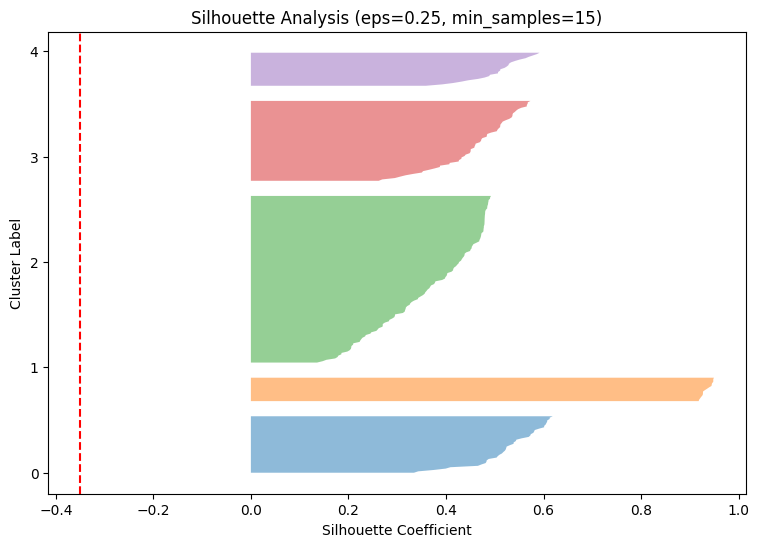

<ipython-input-39-ba4dda26923f>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors1 = cm.get_cmap('viridis', len(cluster_labels))(range(len(cluster_labels)))


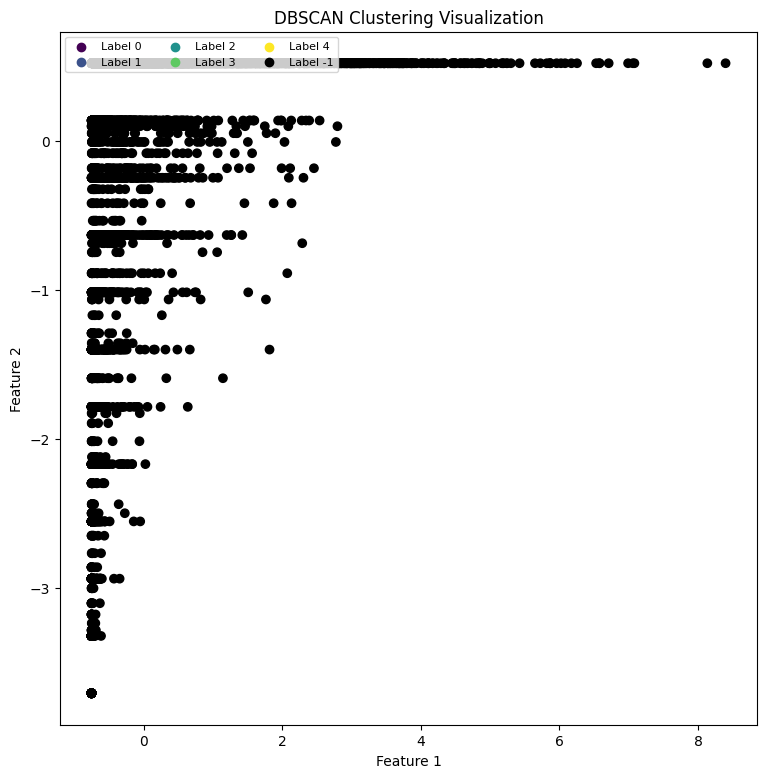

In [ ]:
# 다양한 eps 및 min_samples 값 시도
for eps in [0.0375,0.05, 0.1, 0.15, 0.2, 0.25]:
    for min_samples in [3, 5, 10, 15, 20,30]:
        # DBSCAN 모델 생성 및 훈련
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels1 = db.labels_

        # 고유한 클러스터 레이블 가져오기
        unique_labels = set(labels1)
        cluster_labels = [label for label in unique_labels if label != -1]

        # 클러스터 수가 4개인지 확인
        if len(cluster_labels)==5 :
            # 실루엣 점수 계산
            silhouette_vals = silhouette_samples(X_scaled, labels1)
            silhouette_avg = silhouette_score(X_scaled, labels1)

            # 결과 저장
            results.append({'eps': eps, 'min_samples': min_samples, 'silhouette_avg': silhouette_avg})
            print(eps,min_samples,silhouette_avg)

            # 실루엣 플롯 그리기
            plt.figure(figsize=(9, 6))
            y_lower = 10
            for i in range(len(cluster_labels)):
                cluster_silhouette_vals = silhouette_vals[labels1 == cluster_labels[i]]
                cluster_silhouette_vals.sort()
                size = cluster_silhouette_vals.shape[0]
                y_upper = y_lower + size
                plt.fill_betweenx(np.arange(y_lower, y_upper), cluster_silhouette_vals, alpha=0.5)
                y_lower = y_upper + 10

            plt.axvline(silhouette_avg, color='red', linestyle='--')
            plt.title(f'Silhouette Analysis (eps={eps}, min_samples={min_samples})')
            plt.xlabel('Silhouette Coefficient')
            plt.ylabel('Cluster Label')
            ytick_positions = np.linspace(10, y_lower - 10, len(cluster_labels))
            plt.yticks(ytick_positions, cluster_labels)
            plt.show()

            # 클러스터 시각화
            colors1 = cm.get_cmap('viridis', len(cluster_labels))(range(len(cluster_labels)))
            colours1 = dict(zip(cluster_labels, colors1))
            colours1[-1] = 'k'  # 노이즈는 검은색으로 고정
            cvec = [colours1[label] for label in labels1]

            plt.figure(figsize=(9, 9))
            plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cvec)
            handles = []
            labels = []
            for label, color in colours1.items():
                handles.append(plt.scatter([], [], color=color))
                labels.append(f'Label {label}')
            plt.legend(handles, labels, scatterpoints=1, loc='upper left', ncol=3, fontsize=8)
            plt.title('DBSCAN Clustering Visualization')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.show()

            break  # 적절한 설정을 찾으면 내부 루프 종료
    else:
        continue
    break

else:
    print("4개의 클러스터를 생성하는 설정을 찾지 못했습니다.")

Nearest Neighbors로 최적의 eps 찾기

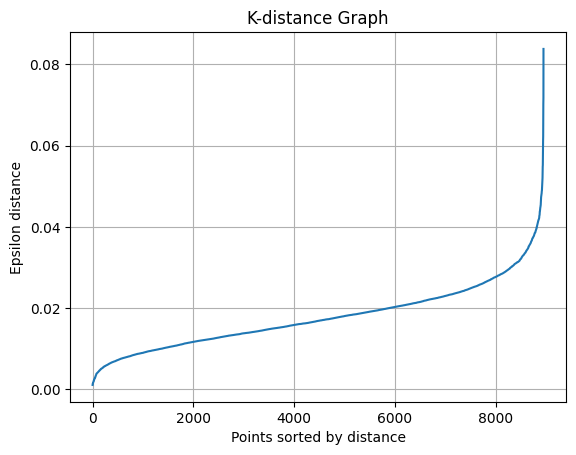

2개 이상의 클러스터를 생성하는 설정을 찾지 못했습니다.
결과가 없습니다.


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Nearest Neighbors로 최적의 eps 찾기
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_principal)
distances, indices = neighbors_fit.kneighbors(X_principal)
distances = np.sort(distances[:, 4], axis=0)  # 4번째 거리 사용
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance')
plt.grid()
plt.show()

# 결과를 저장할 리스트 초기화
results = []

# 다양한 eps 및 min_samples 값 시도
eps_values = [0.1, 0.15, 0.2, 0.25, 0.3]
min_samples_values = [3, 5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        # DBSCAN 모델 생성 및 훈련
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_principal)
        labels1 = db.labels_

        # 고유한 클러스터 레이블 가져오기
        unique_labels = set(labels1)
        cluster_labels = [label for label in unique_labels if label != -1]

        # 2개 이상의 클러스터가 있는지 확인
        if len(cluster_labels) > 1:
            # 실루엣 점수 계산
            silhouette_vals = silhouette_samples(X_principal, labels1)
            silhouette_avg = silhouette_score(X_principal, labels1)

            # 결과 저장
            results.append({'eps': eps, 'min_samples': min_samples, 'silhouette_avg': silhouette_avg})

            # 실루엣 플롯 그리기
            plt.figure(figsize=(9, 6))
            y_lower = 10
            for i in range(len(cluster_labels)):
                cluster_silhouette_vals = silhouette_vals[labels1 == cluster_labels[i]]
                cluster_silhouette_vals.sort()
                size = cluster_silhouette_vals.shape[0]
                y_upper = y_lower + size
                plt.fill_betweenx(np.arange(y_lower, y_upper), cluster_silhouette_vals, alpha=0.7)
                y_lower = y_upper + 10

            plt.axvline(silhouette_avg, color='red', linestyle='--')
            plt.title(f'Silhouette Analysis (eps={eps}, min_samples={min_samples})')
            plt.xlabel('Silhouette Coefficient')
            plt.ylabel('Cluster Label')
            ytick_positions = np.linspace(10, y_lower - 10, len(cluster_labels))
            plt.yticks(ytick_positions, cluster_labels)
            plt.show()

            # 클러스터 시각화
            colors1 = cm.get_cmap('viridis', len(cluster_labels))(range(len(cluster_labels)))
            colours1 = dict(zip(cluster_labels, colors1))
            colours1[-1] = 'k'  # 노이즈는 검은색으로 고정
            cvec = [colours1[label] for label in labels1]

            plt.figure(figsize=(9, 9))
            plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
            handles = []
            labels = []
            for label, color in colours1.items():
                handles.append(plt.scatter([], [], color=color))
                labels.append(f'Label {label}')
            plt.legend(handles, labels, scatterpoints=1, loc='upper left', ncol=3, fontsize=8)
            plt.title('DBSCAN Clustering Visualization')
            plt.xlabel('Principal Component 1')
            plt.ylabel('Principal Component 2')
            plt.show()

            break  # 적절한 설정을 찾으면 내부 루프 종료
    else:
        continue
    break
else:
    print("2개 이상의 클러스터를 생성하는 설정을 찾지 못했습니다.")

# 최적의 eps 및 min_samples 출력
if results:
    best_result = max(results, key=lambda x: x['silhouette_avg'])
    print(f"최적의 eps: {best_result['eps']}, min_samples: {best_result['min_samples']}, 실루엣 평균: {best_result['silhouette_avg']}")
else:
    print("결과가 없습니다.")


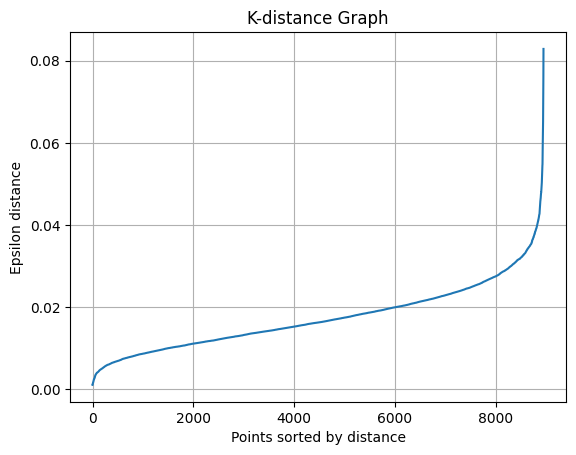

<ipython-input-78-f24906cf023e>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('jet', len(unique_labels))  # jet 색상 맵을 사용하여 색상 할당


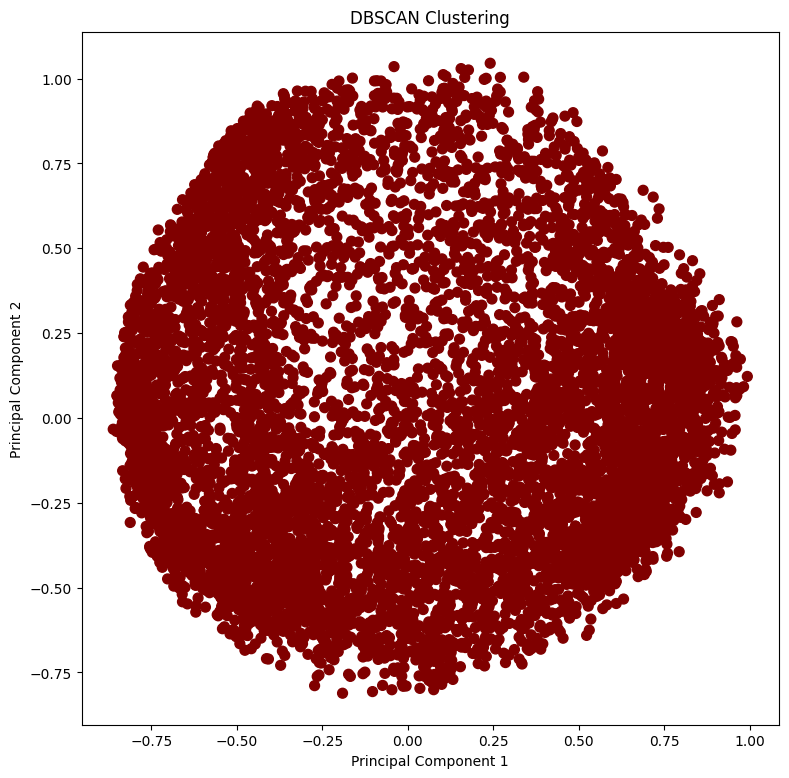

In [ ]:

# Nearest Neighbors로 최적의 eps 찾기
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_principal)
distances, indices = neighbors_fit.kneighbors(X_principal)
distances = np.sort(distances[:, 4], axis=0)  # 4번째 거리 사용
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance')
plt.grid()
plt.show()

# DBSCAN 모델 생성 및 훈련
# eps 값을 그래프를 참고하여 적절한 값으로 수정
db_default = DBSCAN(eps=1, min_samples=20).fit(X_principal)

# 클러스터 레이블 저장
labels = db_default.labels_

# 클러스터링 결과 시각화
unique_labels = set(labels)  # 고유한 레이블 추출
colors = plt.cm.get_cmap('jet', len(unique_labels))  # jet 색상 맵을 사용하여 색상 할당

# 색상 벡터 생성
cvec = [colors(label + 1) if label != -1 else (0, 0, 0, 1) for label in labels]  # -1인 경우 검은색으로 지정

plt.figure(figsize=(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec, s=50)  # 크기를 지정하여 시각화
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



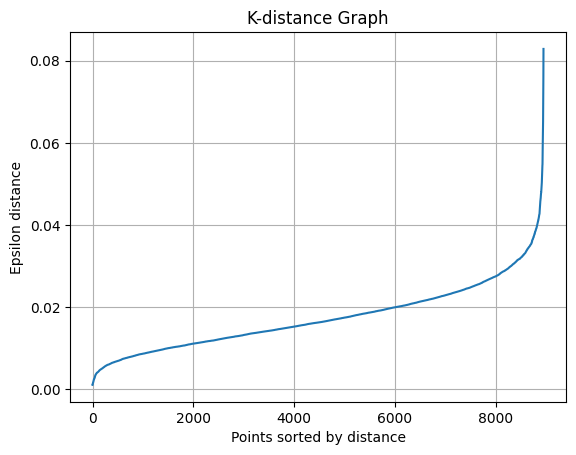

DBSCAN 결과를 dbscan_results.csv로 저장했습니다.
    eps  min_samples  n_clusters  n_noise  silhouette_avg
0  0.05            3           1        4       -1.000000
1  0.05            5           1        9       -1.000000
2  0.05           10           2       31       -0.173254
3  0.10            3           1        0       -1.000000
4  0.10            5           1        0       -1.000000
5  0.10           10           1        0       -1.000000
6  0.20            3           1        0       -1.000000
7  0.20            5           1        0       -1.000000
8  0.20           10           1        0       -1.000000
최적의 설정:
eps                0.050000
min_samples       10.000000
n_clusters         2.000000
n_noise           31.000000
silhouette_avg    -0.173254
Name: 2, dtype: float64


<ipython-input-76-f18fbe02b679>:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('jet', len(unique_labels))  # jet 색상 맵을 사용하여 색상 할당


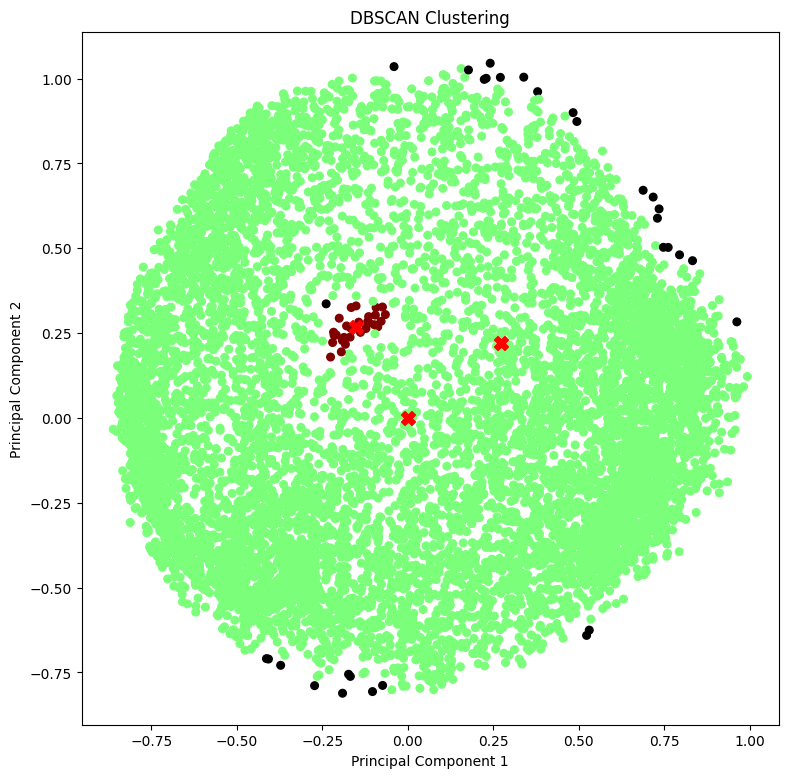

In [ ]:

# Nearest Neighbors로 최적의 eps 찾기
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_principal)
distances, indices = neighbors_fit.kneighbors(X_principal)
distances = np.sort(distances[:, 4], axis=0)  # 4번째 거리 사용
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon distance')
plt.grid()
plt.show()

# 하이퍼파라미터 튜닝을 위한 eps 및 min_samples 값 리스트
eps_values = [0.05, 0.1, 0.2]
min_samples_values = [3, 5, 10]

# 결과를 저장할 리스트 초기화
results = []

# 다양한 eps 및 min_samples 값 시도
for eps in eps_values:
    for min_samples in min_samples_values:
        # DBSCAN 모델 생성 및 훈련
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_principal)
        labels = db.labels_

        # 클러스터 수 및 노이즈 비율 계산
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # 실루엣 점수 계산 (노이즈를 제외한 경우에만)
        if n_clusters > 1:
            silhouette_avg = silhouette_score(X_principal, labels)
        else:
            silhouette_avg = -1  # 유효한 실루엣 점수가 없을 경우

        results.append({'eps': eps, 'min_samples': min_samples,
                        'n_clusters': n_clusters, 'n_noise': n_noise,
                        'silhouette_avg': silhouette_avg})

# 결과를 DataFrame으로 변환하여 CSV 파일로 저장
results_df = pd.DataFrame(results)
results_df.to_csv('dbscan_results.csv', index=False)
print("DBSCAN 결과를 dbscan_results.csv로 저장했습니다.")
print(results_df)

# 최적의 설정 찾기
best_result = results_df.loc[results_df['silhouette_avg'].idxmax()]

# 디버깅을 위한 best_result 출력
print("최적의 설정:")
print(best_result)

try:
    # 최적의 eps 및 min_samples로 DBSCAN 모델 생성 및 훈련
    db_default = DBSCAN(eps=float(best_result['eps']), min_samples=int(best_result['min_samples'])).fit(X_principal)

    # 클러스터 레이블 저장
    labels = db_default.labels_

    # 클러스터링 결과 시각화
    unique_labels = set(labels)  # 고유한 레이블 추출
    colors = plt.cm.get_cmap('jet', len(unique_labels))  # jet 색상 맵을 사용하여 색상 할당

    # 색상 벡터 생성
    cvec = [colors(label + 1) if label != -1 else (0, 0, 0, 1) for label in labels]  # -1인 경우 검은색으로 지정

    plt.figure(figsize=(9, 9))
    plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec, s=30)  # 크기를 지정하여 시각화
    plt.title('DBSCAN Clustering')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # 클러스터 중심 계산 및 시각화
    if best_result['n_clusters'] > 0:
        cluster_centers = X_principal.groupby(labels).mean()
        plt.scatter(cluster_centers['P1'], cluster_centers['P2'], c='red', s=100, marker='X')  # 클러스터 중심 표시

    plt.show()

except Exception as e:
    print(f"오류 발생: {e}")
